## Loading Data and Libraries

In [2]:
# Importing Librariess
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
# Loading Data
df = pd.read_csv('/Users/indrakaran_varikuti/Downloads/adult-all.csv',header=None)

In [4]:
# Loading Columns
df.columns = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race'
             ,'sex','cg','cl','hpw','nc','class']

In [5]:
# Checking Loading of data
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,cg,cl,hpw,nc,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Visualization

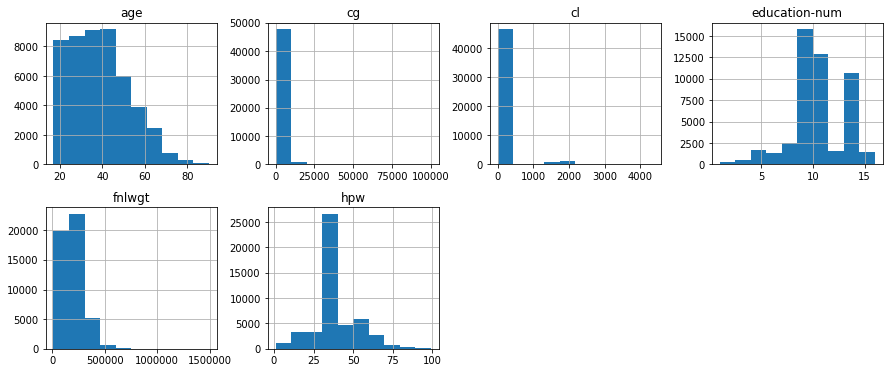

In [6]:
# Plotting Numerical data
numerical = ['age','fnlwgt','education-num','cg','cl','hpw']
df[numerical].hist(bins=10, figsize=(15, 6), layout=(2, 4));

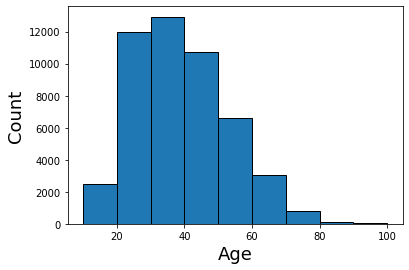

In [7]:
# Plotting Age by splitting into bins
bins= [10,20,30,40,50,60,70,80,90,100]
plt.hist(df['age'], bins=bins, edgecolor="k")
plt.xlabel('Age',fontsize=18)
plt.ylabel('Count',fontsize=18)
plt.show()

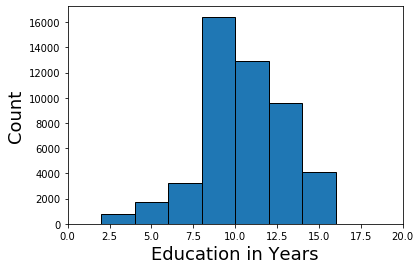

In [8]:
# Plotting Education Num by splitting into bins
ed_bins = [2,4,6,8,10,12,14,16]
plt.hist(df['education-num'], bins=ed_bins,edgecolor="k")
plt.xlim([0,20])
plt.xlabel('Education in Years',fontsize=18)
plt.ylabel('Count',fontsize=18)
plt.show()

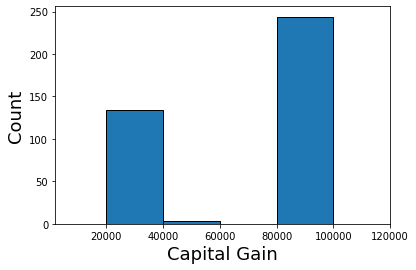

In [9]:
# Plotting Capital Gain by splitting into bins
cg_bins = [20000,40000,60000,80000,100000,120000]
plt.hist(df['cg'], bins=cg_bins,edgecolor="k")
plt.xlim([2000,120000])
plt.xlabel('Capital Gain',fontsize=18)
plt.ylabel('Count',fontsize=18)
plt.show()

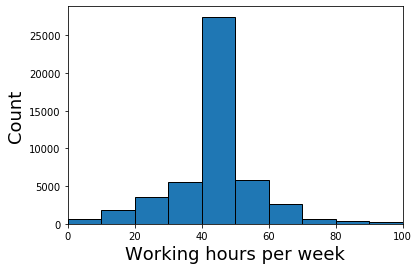

In [10]:
# Plotting Hours per week by splitting into bins
cg_bins = [0,10,20,30,40,50,60,70,80,90,100]
plt.hist(df['hpw'], bins=cg_bins,edgecolor="k")
plt.xlim([0,100])
plt.xlabel('Working hours per week',fontsize=18)
plt.ylabel('Count',fontsize=18)
plt.show()

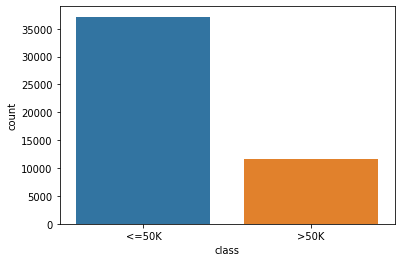

In [11]:
# Checking count of instances related to each class
sns.countplot(df['class'])

## Mean

In [12]:
mean = np.mean(df['age'])
print(mean)
ed_mean = np.mean(df['education-num'])
print(ed_mean)
cg_mean = np.mean(df['cg'])
print(cg_mean)
hpw_mean = np.mean(df['hpw'])
print(hpw_mean)

38.64358543876172
10.078088530363212
1079.0676262233324
40.422382375824085


## Standard Deaviation

In [13]:
std = np.std(df['age'])
print(std)
ed_std = np.std(df['education-num'])
print(ed_std)
cg_std = np.std(df['cg'])
print(cg_std)
hpw_std = np.std(df['hpw'])
print(hpw_std)

13.710369577986512
2.570946436174984
7451.942770265495
12.391317171266053


## Skewness

In [15]:
from scipy.stats import skew
sk = skew(df['age'])
print(sk)
ed_sk = skew(df['education-num'])
print(ed_sk)
cg_sk = skew(df['cg'])
print(cg_sk)
hpw_sk = skew(df['hpw'])
print(hpw_sk)

0.5575631924658626
-0.3165151356965018
11.894293693350868
0.2387423248342843


## Kurtosis

In [16]:
from scipy.stats import kurtosis
kt = kurtosis(df['age'])
print(kt)
ed_kt = kurtosis(df['education-num'])
print(ed_kt)
cg_kt = kurtosis(df['cg'])
print(cg_kt)
hpw_kt = kurtosis(df['hpw'])
print(hpw_kt)
fwt_kt = kurtosis(df['fnlwgt'])
print(fwt_kt)
cl_kt = kurtosis(df['cl'])
print(cl_kt)

-0.18437271998309956
0.6255583739336319
152.6773425724958
2.950634153321035
6.057105240227166
20.012174283988244


In [17]:
# Retaining Numerical data from the dataset
retain = list(df._get_numeric_data().columns)
df_temp = df[retain]

In [18]:
# Calculating IQR for checking Outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
lower  = Q1 - 1.5 * IQR
higher = Q3 + 1.5 * IQR

In [19]:
# Calculating Outliers for Capital Gain
df[(df['cg']<lower['cg']) | (df['cg']>higher['cg'])]

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,cg,cl,hpw,nc,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
59,30,Private,188146,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,5013,0,40,United-States,<=50K
60,30,Private,59496,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,2407,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48805,32,Private,24529,Assoc-voc,11,Married-civ-spouse,Sales,Husband,White,Male,5178,0,60,United-States,>50K
48812,81,?,26711,Assoc-voc,11,Married-civ-spouse,?,Husband,White,Male,2936,0,20,United-States,<=50K
48813,60,Private,117909,Assoc-voc,11,Married-civ-spouse,Prof-specialty,Husband,White,Male,7688,0,40,United-States,>50K
48822,40,Private,202168,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,15024,0,55,United-States,>50K


In [20]:
# Since the number of outliers for Capital gain are high we can ignore from the dataset
48842-4035

44807

## Box Plots

[Text(0.5, 0, 'Education in Years')]

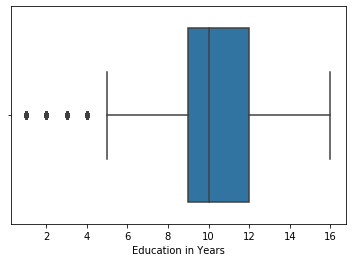

In [21]:
sns.boxplot(df['education-num']).set(xlabel='Education in Years')

[Text(0.5, 0, 'Age')]

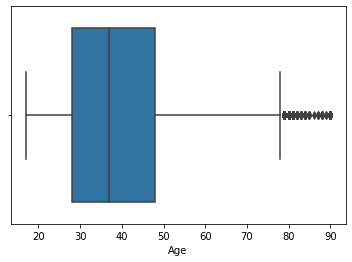

In [22]:
sns.boxplot(df['age']).set(xlabel='Age')

[Text(0.5, 0, 'Capital Gain')]

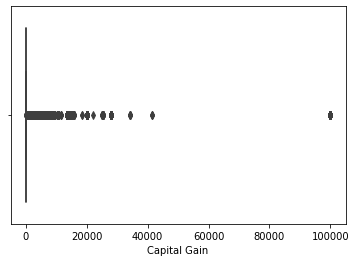

In [23]:
sns.boxplot(df['cg']).set(xlabel='Capital Gain')

[Text(0.5, 0, 'Working hours per week')]

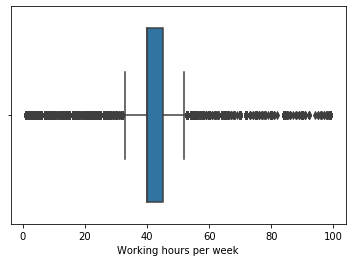

In [24]:
sns.boxplot(df['hpw']).set(xlabel='Working hours per week')

## Analyzing Relationships Between Numerical Variables

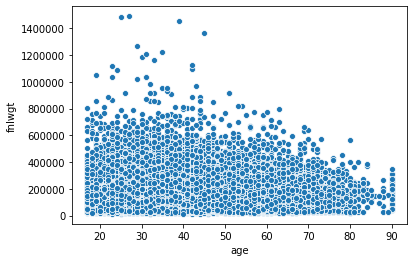

In [26]:
sns.scatterplot(x=df['age'], y=df['fnlwgt']);

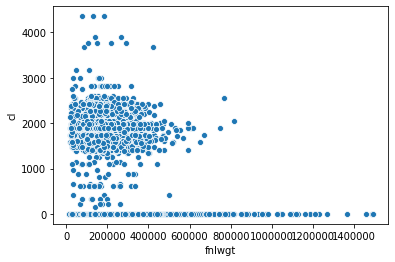

In [27]:
sns.scatterplot(x=df['fnlwgt'], y=df['cl']);

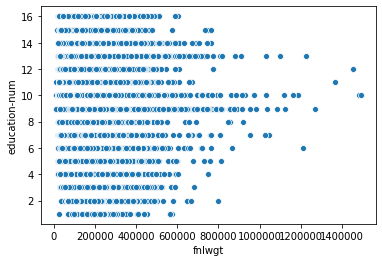

In [28]:
sns.scatterplot(x=df['fnlwgt'], y=df['education-num']);

## Analyzing Relationships Between Numerical and Categorical Variables

[Text(0, 0.5, 'Race'), Text(0.5, 0, 'Education in years')]

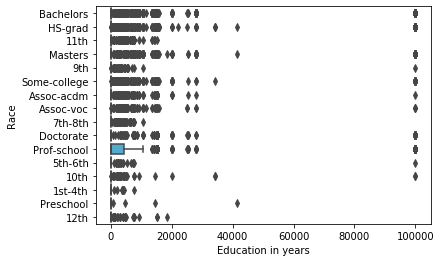

In [29]:
sns.boxplot(x=df['cg'],y=df['education']).set(xlabel='Education in years', ylabel='Race')

[Text(0, 0.5, 'Education in years'), Text(0.5, 0, 'Sex')]

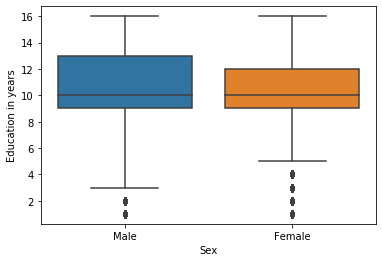

In [30]:
sns.boxplot(x=df['sex'],y=df['education-num']).set(xlabel='Sex', ylabel='Education in years')

## Transforming the categorical data to numerical data

In [32]:
nc_list = []
for i in range(1,43):
    nc_list.append(i)

In [33]:
df_obj = df.select_dtypes(include=['object']).copy()

In [34]:
print(df_obj.isna().values.sum())

0


In [35]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['workclass'] = le.fit_transform(df['workclass'])
df['education'] = le.fit_transform(df['education'])
df['marital-status'] = le.fit_transform(df['marital-status'])
df['occupation'] = le.fit_transform(df['occupation'])
df['relationship'] = le.fit_transform(df['relationship'])
df['race'] = le.fit_transform(df['race'])
df['sex'] = le.fit_transform(df['sex'])
df['nc'] = le.fit_transform(df['nc'])
df['class'] = le.fit_transform(df['class'])

## Correlation between columns

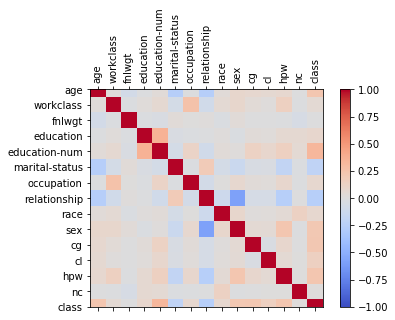

In [36]:
corr = df.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(df.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df.columns)
ax.set_yticklabels(df.columns)
plt.show()

## Prinipal component analysis and Feature extraction

In [38]:
# Creating Test and training set
x = df.drop('class',axis=1)
y = df['class']
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x,y,test_size=0.2,random_state=42)

In [39]:
# Training random forest classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
sel = SelectFromModel(RandomForestClassifier(n_estimators=1000, random_state=42, n_jobs=-1))
sel.fit(train_x,train_y)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True,
                                                 class_weight=None,
                                                 criterion='gini',
                                                 max_depth=None,
                                                 max_features='auto',
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=1000, n_jobs=-1,
                                                 oob_score=False,
                                                 random_state=42, verbose=0,
     

In [40]:
sel.get_support()

array([ True, False,  True, False,  True, False, False,  True, False,
       False,  True, False,  True, False])

In [41]:
selected_feat= train_x.columns[(sel.get_support())]
len(selected_feat)

6

In [47]:
selected_feat

Index(['age', 'fnlwgt', 'education-num', 'relationship', 'cg', 'hpw'], dtype='object')

In [43]:
clf = RandomForestClassifier(n_estimators=1000, random_state=42, n_jobs=-1)
clf.fit(train_x,train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [44]:
clf.feature_importances_

array([0.14768793, 0.03871745, 0.17510968, 0.03220087, 0.08827505,
       0.06805498, 0.06512368, 0.10779623, 0.01355608, 0.01198897,
       0.1151627 , 0.03693022, 0.08221961, 0.01717656])

In [45]:
 0.10779622766729323+ 0.11516269851059355+ 0.14768793279368492+ 0.17510967949792478 +  0.08221960568338615+ 0.08827505343281351+ 0.06512367664602128 + 0.06805498304615729

0.8494298572778747

In [47]:
from sklearn.decomposition import PCA
pca=PCA(n_components=3)
fit = pca.fit(df)

In [48]:
fit.explained_variance_ratio_

array([9.95030768e-01, 4.95471559e-03, 1.44763548e-05])

In [49]:
print(fit.components_)

[[-9.94876504e-06 -2.29423464e-07  9.99999965e-01 -8.28104270e-07
  -9.43701076e-07  4.26195072e-07  3.44517729e-08  1.37954903e-07
  -2.16795603e-07  1.23651494e-07 -2.62852522e-04 -1.66600529e-05
  -1.58644813e-06 -3.58415600e-06 -2.56262909e-08]
 [ 1.41555980e-04  7.07000937e-06  2.62825386e-04  1.49957385e-05
   4.31240074e-05 -8.87291823e-06  1.37181260e-05 -1.21411823e-05
   1.30306004e-06  2.98134906e-06  9.99998489e-01 -1.70619803e-03
   1.36523232e-04 -2.08412016e-06  1.27661288e-05]
 [ 2.01292055e-03  4.34695359e-05  1.71320820e-05  1.77599245e-04
   5.41263971e-04 -1.31646261e-04  1.88635867e-04 -2.34692221e-04
   3.95948185e-05  5.50852303e-05  1.70562734e-03  9.99994743e-01
   1.75614589e-03  6.13123732e-05  1.63823351e-04]]


In [50]:
fit.explained_variance_

array([1.11522110e+10, 5.55319848e+07, 1.62249619e+05])